In [2]:
import numpy as np
import pandas as pd

def readFile(fileName):
    my_file = pd.read_csv( '../content/'+fileName , 
                        sep = ',', names=['x1','x2','x3','x4','x5','x6','x7',
                                          'x8','x9','x10','x11','x12','x13',
                                           'x14','y'])
    return my_file

# read trainfile
train_file = readFile('train.txt')
#convert to numpy
train_data = train_file.values
#read test file
test_file = readFile('test.txt')
#Convert to numpy
test_data = test_file.values

print('Data Downloaded successfully')


Data Downloaded successfully


In [3]:
column_no = np.size(train_data[0])
train_row_no = int(np.size(train_data)/column_no)
test_row_no = int(np.size(test_data)/column_no)
continuous_col = [0,2,4,10,11,12]

#Following steps are not required for HW2. 
#This is done to utilize gender, locality etc

'''
for i in range(column_no-1):
  if i in continuous_col:
    continue    
  unique_arr = np.unique(train_data[:,i])
  arr_len = len(unique_arr)
  if(i in [1,6,13]):
    for k in range(arr_len):
      if unique_arr[k] == ' ?':
        unique_arr[k] = unique_arr[arr_len-1]
        unique_arr[arr_len-1]=' ?'
        
  x = arr_len//2
  if arr_len%2 == 1:
    train_data[np.where(train_data[:,i] == unique_arr[arr_len-1]),i] = 0
    test_data[np.where(test_data[:,i] == unique_arr[arr_len-1]),i] = 0
    
    
  for j in range(1,x+1):
    train_data[np.where(train_data[:,i] == unique_arr[x-j]),i] = (-1*j)
    train_data[np.where(train_data[:,i] == unique_arr[x+j-1]),i] = j
    test_data[np.where(test_data[:,i] == unique_arr[x-j]),i] = (-1*j)
    test_data[np.where(test_data[:,i] == unique_arr[x+j-1]),i] = j
'''
train_data[np.where(train_data[:,14] == ' <=50K'),14] = -1
train_data[np.where(train_data[:,14] == ' >50K'),14] = 1

print("Taxt Data Scaled successfully")

Taxt Data Scaled successfully


In [4]:
cont_col_len = len(continuous_col)
train_continuous_data = train_data[:,continuous_col[0]]
test_continuous_data = test_data[:,continuous_col[0]]

train_continuous_data = train_continuous_data.reshape(train_row_no,1)
test_continuous_data = test_continuous_data.reshape(test_row_no,1)


for i in range(1,cont_col_len):
  train_continuous_data = np.append(train_continuous_data,train_data[:,continuous_col[i]].reshape(train_row_no,1), axis=1)
  test_continuous_data = np.append(test_continuous_data,test_data[:,continuous_col[i]].reshape(test_row_no,1), axis=1)

print('Continuous Columns Selected')

Continuous Columns Selected


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_continuous_data)
train_cont_scale_data = scaler.transform(train_continuous_data)
test_cont_scale_data = scaler.transform(test_continuous_data)
print("Data Rescaled")


Data Rescaled


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
import random
import time

batch_size = 10

def split(arr):
    x= random.randint(0,int(train_row_no*.9))
    y = int(train_row_no*.1)
    train = arr[0:x]
    label = train_data[0:x,14].reshape(x,1)
    test = arr[x:x+y]
    label_test = train_data[x:x+y,14].reshape(y,1)
    train2 = arr[x+y:train_row_no]
    label2 = train_data[x+y:train_row_no,14].reshape(train_row_no-(x+y),1)
    train = np.append(train,train2,axis=0)
    label = np.append(label,label2,axis=0)
    return (train, test,label, label_test)

  
def shuffle(arr, arr2):
    x= random.randint(0,int((np.size(arr)/6)-50))
    y = 50
    train = arr[0:x]
    label = arr2[0:x]
    test = arr[x:x+y]
    label_test = arr2[x:x+y]
    train2 = arr[x+y:]
    label2 = arr2[x+y:]
    train = np.append(train, train2, axis=0)
    label = np.append(label,label2, axis=0)
    
    return (train, test, label, label_test)

def calculateta(m,n,k):
  return m/(n+k)

def f(y,x,a,b):
  #print(x)
  #print(y)
  #print(a)
  #print(b)
  #print (np.multiply(y, (np.sum(np.multiply(a, x),axis=1)+b).reshape(np.size(y),1)))
  #time.sleep(30)
  return np.multiply(y, (np.sum(np.multiply(a, x),axis=1)+b).reshape(np.size(y),1))
  #note N = 1 on our case or 300? or 30 (as we are supposed to plot after 50 points) 


def cost_function(x, y, a, b):
  #TO DO: we might need to create an array of zeros 
  #if maximum function is not able to handle scaler and vector together
  return np.mean(np.maximum(0, (1-f(y,x,a,b)) ))
  #N will be one ??? or 300?? as step sizes are 300

def gradient_of_cost_b(a, b,x, y, lam):
  gradient_b = np.zeros((batch_size,1))
  gradient_b[np.where(f(y,x,a,b)>=1)] = 0
  gradient_b[np.where(f(y,x,a,b)<1)] = np.multiply(-1, y[np.where(f(y,x,a,b)<1)])
  
  #print(gradient_b)
  #print(np.mean(gradient_b))
  #time.sleep(30)
  return np.mean(gradient_b)

def gradient_of_cost_a(a,b,x,y,lam):
  gradient_a = np.zeros((batch_size,6))
  a_temp = np.multiply(lam,a)
  a_temp1 = np.copy(a_temp)
  for i in range(1,batch_size):
    a_temp1 = np.append(a_temp1,a_temp, axis=0)
  
  #print(a_temp1)
  cost = f(y,x,a,b)
  #print(cost)
  r = np.where(cost>=1)
  gradient_a[r] = a_temp1[r]
  #print(x)
  #print(y)
  a_temp = np.multiply(lam,a) - np.multiply(y,x)
  
  #print(a_temp)
  r = np.where(cost<1)
  #print(r)
  #print(a_temp[r])
  gradient_a[r,:] = a_temp[r,:]
  #print(gradient_a)
  #print(np.mean(gradient_a,axis=0))
  #time.sleep(30)
  return np.mean(gradient_a, axis=0)

def predict(a,b,test,test_label,accuracy = True):
  l_score = 0
  res = []
  d_res = {1:'>50K', -1: '<=50K'}
  #print(np.size(test))
  for i in range(int(np.size(test)/6)):
    val = np.sum(np.multiply(a,test[i]))+b
    val = val/abs(val)
    res.append(d_res[val])
    if accuracy:
      if val== test_label[i]:
        l_score +=1
  return l_score, res
      
def magnitude(a,b):
  
  
  v = np.append(a,b)
  
  #print(v)
  #time.sleep(30)
  return np.linalg.norm(v)
  
regularization =  [ 1/1000,2/1000,3/1000,4/1000,5/1000, 
                   8/1000,1/100,4/100, 5/100, 6/100,1/10, 1.0,1/100000, 1/10000]
d_accuracy = {}
d_res = {}
eta = 0
m = 1
n = 9
#print('all a and all b')
#print(all_a)
#print(all_b)


for lamda in regularization:
  #get the score for this lamda on split test data 
  #using a model trained on split train data
  accuracy_list = []
  for splitno in range(10):
    split_train_data, split_test_data, label_train_data, label_test_data = split(train_cont_scale_data)

    
    a = np.zeros((1,6))
    b = 0
    epochs = 50
    steps = 300
    all_a = np.zeros((1,6))
    all_b = np.zeros((1,1))
    all_accuracy = np.zeros((1,1))
    all_mag = np.zeros((1,1))
    t = np.zeros((1,1))
    print(lamda)

    for k in range(epochs):
      epoch_train_data, heldout_data, epoch_label, heldout_label = shuffle(split_train_data, label_train_data)
      # use epoch_train_data to get values of a,b using epoch
      eta = calculateta(m,n,k)
      #print(k)
      for i in range(steps):
        n = random.randint(0,int(np.size(epoch_train_data)/6)-1)
        x = epoch_train_data[n:n+batch_size]
        y = epoch_label[n:n+batch_size]
        #print(x)
        #print(y)
        #print(a)
        #print(b)

        a = a - np.multiply(eta,gradient_of_cost_a(a,b,x,y,lamda))
        b = b - eta*gradient_of_cost_b(a,b,x,y,lamda)
        #print(a)
        #print(b)

        t[0,0] = b
        if (i+1)%30 ==0:
          all_b = np.append(all_b, t, axis = 0)
          all_a = np.append(all_a, a, axis = 0)
          #print(all_a)
          #print(all_b)
          # Use held out data for prediction
          score , res = predict(a,b,heldout_data,heldout_label )
          t[0,0] = score/50
          all_accuracy = np.append(all_accuracy,t,axis = 0)
          #print(all_accuracy)
          mag = magnitude(a,b)
          #print(a)
          #print(b)
          #print(mag)
          t[0,0] =mag
          all_mag = np.append(all_mag,t,axis = 0)
          # write code to plot all accuracy, and euclidean magnitude for ai+b vector

    #training completed for this lambda time to predict
    #print(a)
    #print(b)
    #print(split_test_data)
    #print(label_test_data)
    (score, res) = predict(a,b,split_test_data,label_test_data)
    accuracy =  score/int(np.size(split_test_data)/6)
    accuracy_list.append(accuracy)
                          
    #print(score)
    #print(np.size(split_test_data)/6)
    #d_accuracy[lamda] = (score/int(np.size(split_test_data)/6), a,b)
  d_accuracy[lamda] = (sum(accuracy_list)/10, all_accuracy, all_mag)
  #d_res[lamda] = res

#sorted_score = [(lamda, d_accuracy[lamda]) for lamda in sorted(d_accuracy, key=d_accuracy.get, reverse=True)]
#printing the whole list to determine the trand for lambda value
print(d_accuracy)

0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.001
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.003
0.003
0.003
0.003
0.003
0.003
0.003
0.003
0.003
0.003
0.004
0.004
0.004
0.004
0.004
0.004
0.004
0.004
0.004
0.004
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.005
0.008
0.008
0.008
0.008
0.008
0.008
0.008
0.008
0.008
0.008
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.04
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.06
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
0.1
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
1e-05
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
0.0001
{0.001: (0.7964505119453925, array([[0.  ],
       [0.74],
       [0.72],
       [0.72],
       [0.72],
       [0.74],
       [0.74],
       [0.74],
       [0.74],
       [0.74],
       [0.74],
       [0.72],
       [0.72],
      

In [14]:
for x in d_accuracy:
  print(x)
  (w,e,r) = d_accuracy[x]
  print(w)

0.001
0.7964505119453925
0.002
0.7969738339021615
0.003
0.7947667804323093
0.004
0.7962684869169511
0.005
0.7950170648464163
0.008
0.7968828213879408
0.01
0.7990443686006825
0.04
0.7917633674630261
0.05
0.7924232081911262
0.06
0.7987485779294653
0.1
0.7951308304891922
1.0
0.7664163822525596
1e-05
0.7970875995449375
0.0001
0.796769055745165


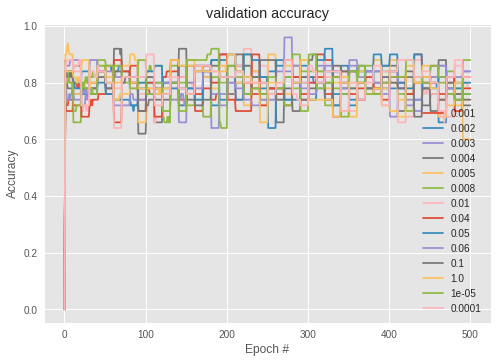

In [15]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
for key in d_accuracy.keys():
  values = np.array(d_accuracy[key][1])
  plt.plot(np.arange(0, len(values)), values, label=key)
plt.title("validation accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

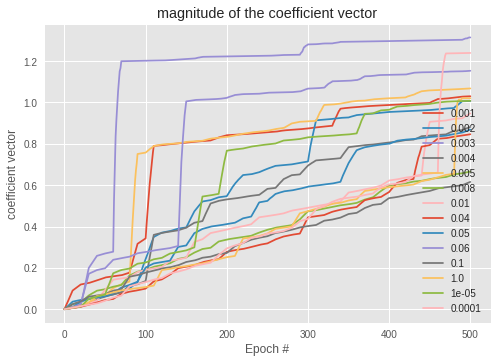

In [16]:
for key in d_accuracy.keys():
  values = np.array(d_accuracy[key][2])
  plt.plot(np.arange(0, len(values)), values, label=key)
plt.title("magnitude of the coefficient vector")
plt.xlabel("Epoch #")
plt.ylabel("coefficient vector")
plt.legend(loc="lower right")

In [0]:
score, res = predict(a,b,test_cont_scale_data,None,accuracy = False)
with open('submission.txt', 'w') as f:
  for i in res:
    f.write('{0}\n'.format(i))